Load file and remove background signal

In [1]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent / "src"))

In [2]:
print(sys.path[-1])

/Users/magdalenaglinka/Documents/code/hBN_PL/src


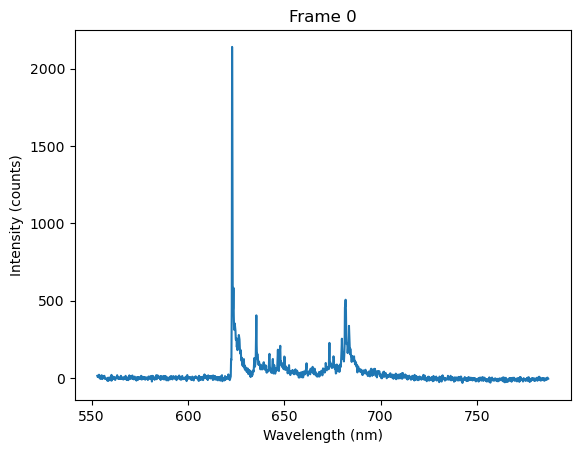

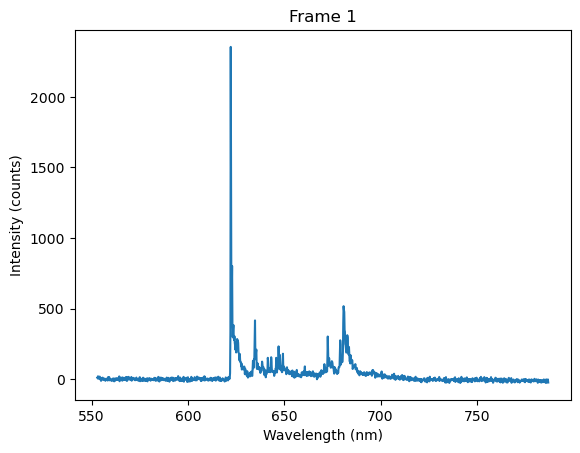

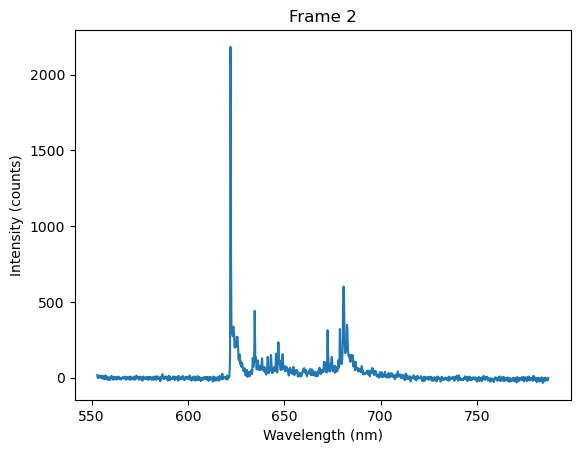

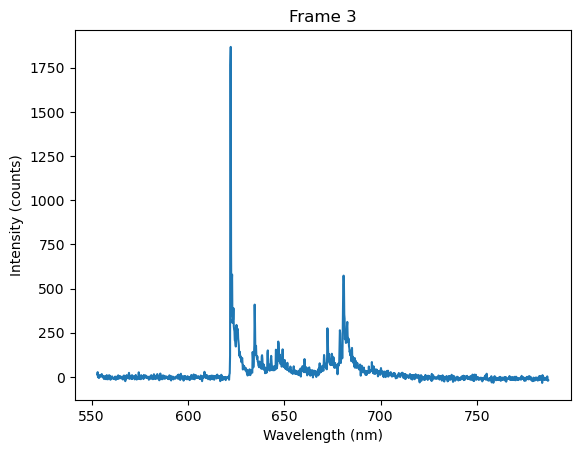

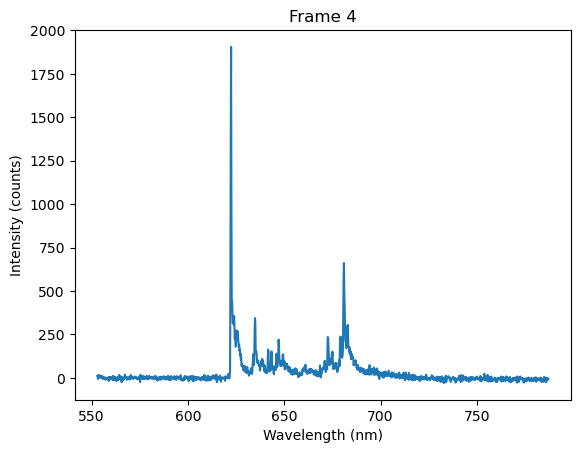

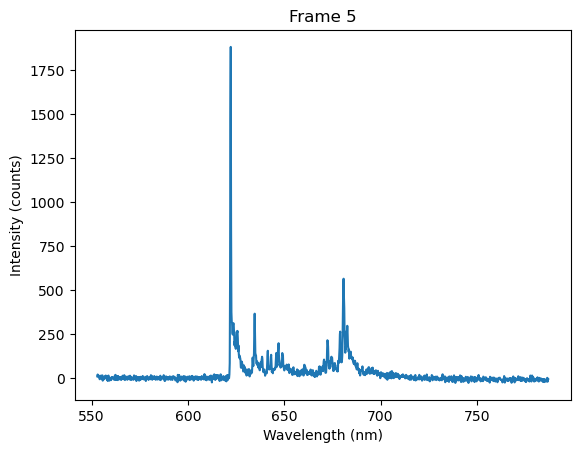

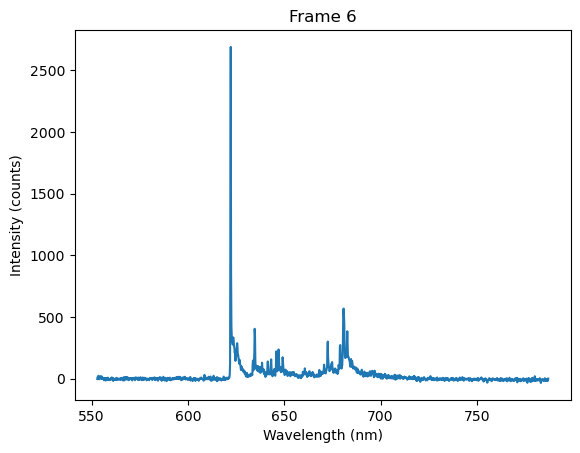

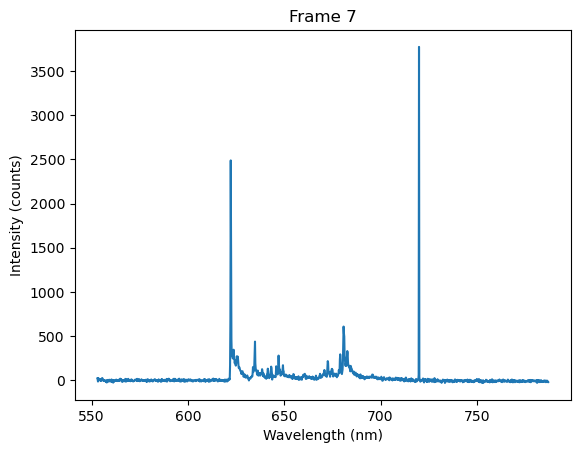

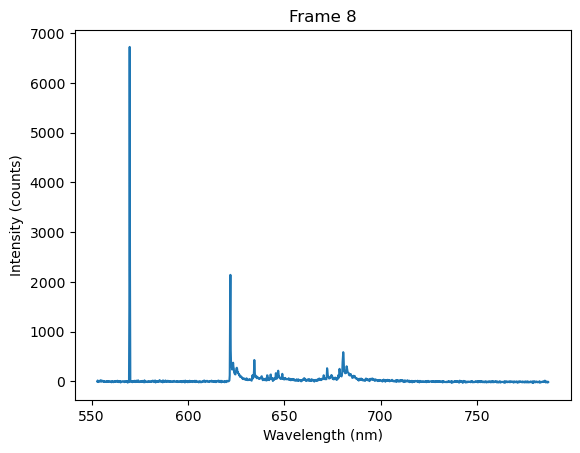

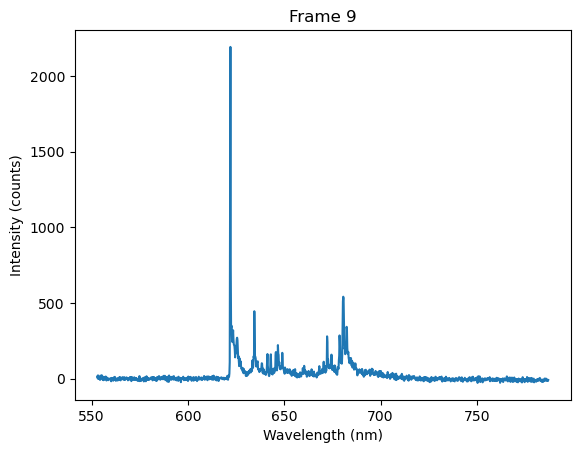

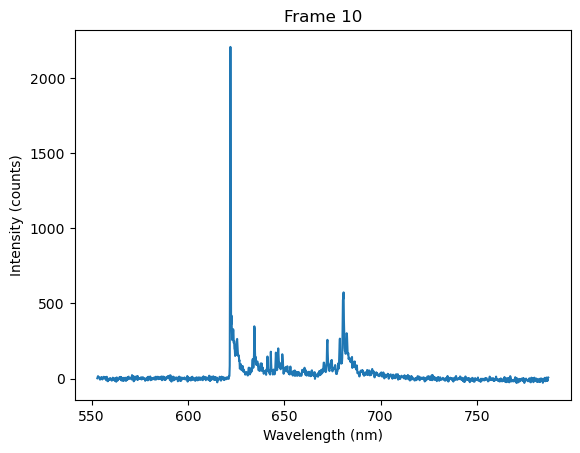

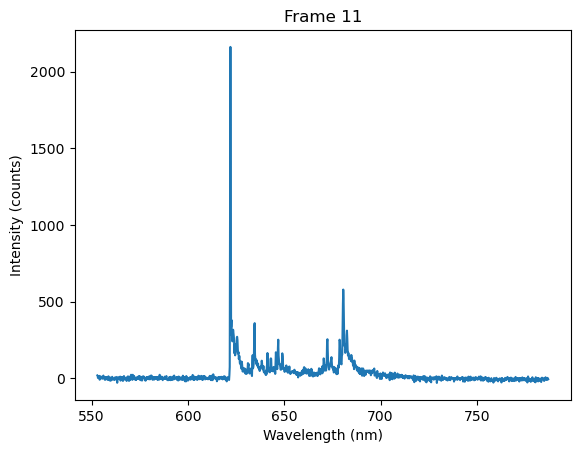

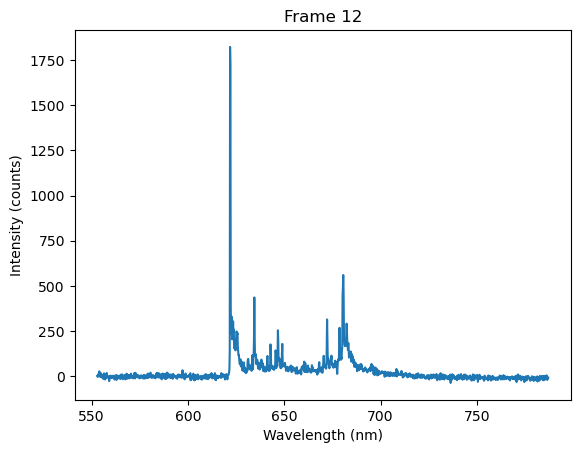

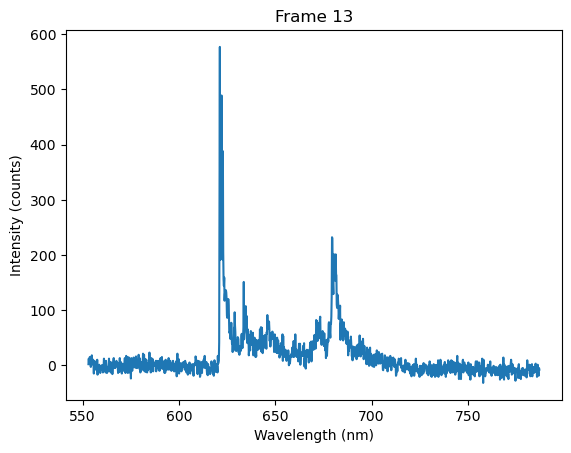

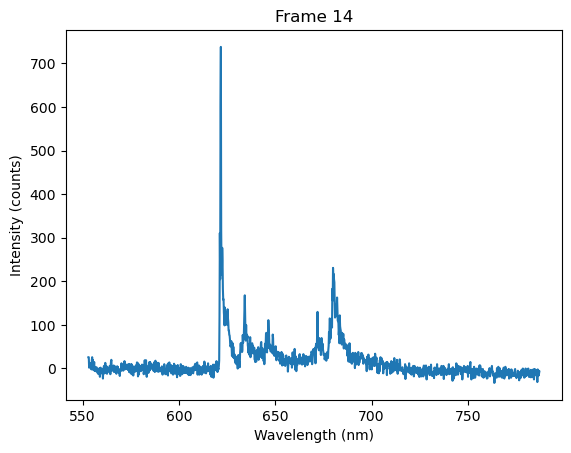

In [3]:
import hbn_pl.io as io
import hbn_pl.preprocess as preprocess
import hbn_pl.plot as plot
import hbn_pl.peaks as peaks


DATA_DIR = Path("/Users/magdalenaglinka/Documents/code/hBN_PL/Data/All data")
FILE_NAME = '2025-11-17 16_29_50 sample5_DCMd2_200uw_emitter6 2184.spe'
#FILE_NAME = '2025-11-17 17_34_30 sample5_DCMd2_200uw_emitter11 2189.spe'
#FILE_NAME = '2025-11-17 17_59_53 sample5_DCMd2_200uw_emitter17 2195.spe'
spe_path = DATA_DIR / FILE_NAME
wavelength, frames = io.load_spe(spe_path)
frames = frames[0:15]
frames = preprocess.background_subtract(frames, bg_slice=(1, 50))
plot.plot_frames(wavelength, frames)

Cosmic ray removal

Detected 2 cosmic ray frames: [7, 8]


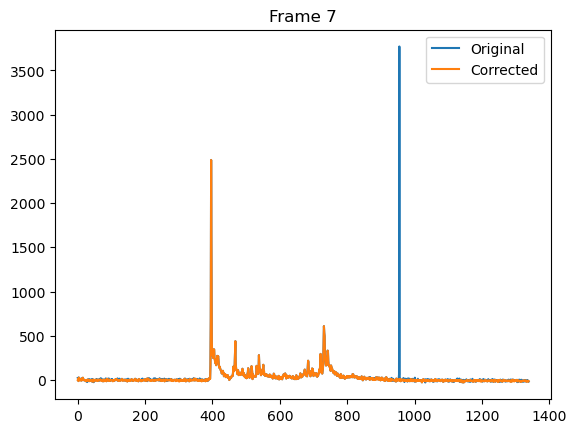

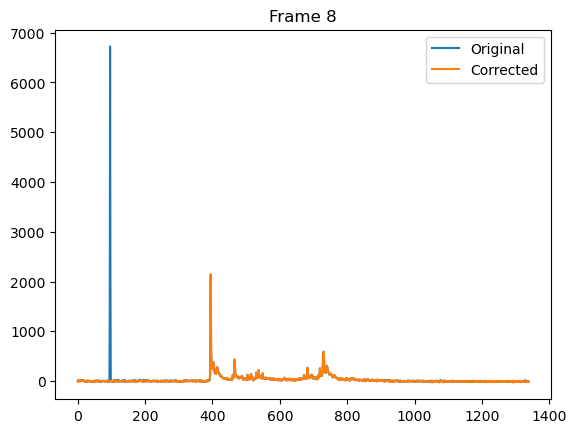

In [4]:
frames_norm = preprocess.normalise(frames)
cosmic_frames = preprocess.detect_cosmic_frames(frames_norm, sigma_threshold=90, min_outliers=3)
frames = preprocess.remove_cosmic_rays(frames, cosmic_frames, sigma=2.5)

Bad frame removal

In [5]:
drop_fraction = 0.6
bad_frames = preprocess.detect_bad_frames_simple(frames, drop_fraction = drop_fraction)
#bad_frames = preprocess.detect_bad_frames_complex(frames, window = 5, drop_fraction = drop_fraction)
#frames = preprocess.remove_frames(frames, bad_frames)

Detected bad frames due to intensity drop 0.6: [13 14]


Average and normalise

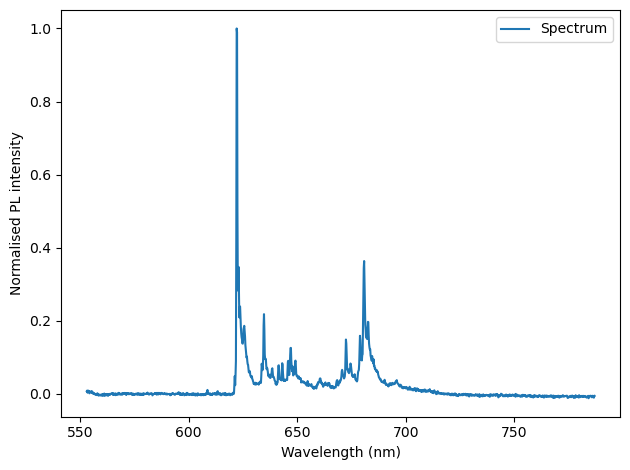

In [6]:
avg, avg_norm = preprocess.average_and_normalise(frames)
plot.plot_spectrum(wavelength, avg_norm)

## Peak finding

In [7]:
import hbn_pl.peaks2 as peaks2
import hbn_pl.classification2 as classification

Detected peaks:
{'location': np.float64(622.0902829065824), 'intensity': np.float64(1.0), 'fwhm': np.float64(0.5246239069165313), 'prominence': np.float64(1.0061460038367873)}
{'location': np.float64(634.6809157051587), 'intensity': np.float64(0.2176683427221859), 'fwhm': np.float64(0.5245945613369258), 'prominence': np.float64(0.1929445977151574)}
{'location': np.float64(647.0959113625972), 'intensity': np.float64(0.12536587108310446), 'fwhm': np.float64(0.8742659139876423), 'prominence': np.float64(0.10115691955984105)}
{'location': np.float64(672.4475496396001), 'intensity': np.float64(0.14822270176227467), 'fwhm': np.float64(0.6992934418959749), 'prominence': np.float64(0.11474746753123954)}
{'location': np.float64(680.8387964790663), 'intensity': np.float64(0.3631489812342016), 'fwhm': np.float64(1.0488706775084893), 'prominence': np.float64(0.3499566102635112)}


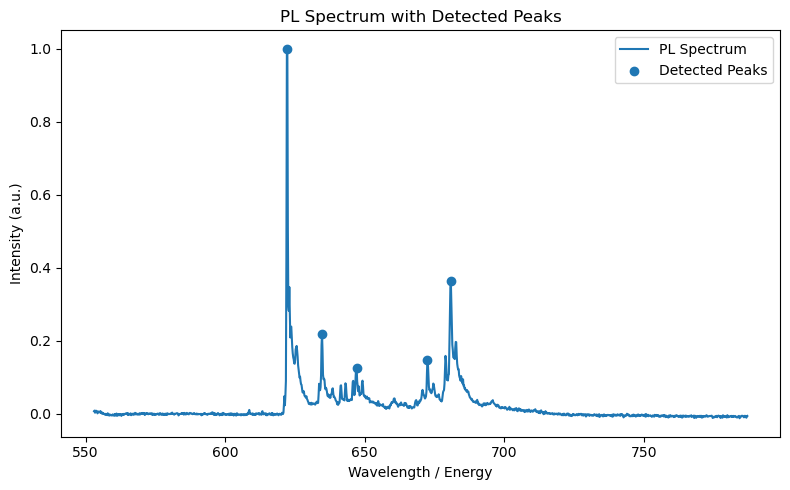

In [8]:
finder = peaks2.PeakFinder(wavelength, avg_norm)

finder.peak_finding(prominence=0.1)

peaks = finder.extract_peak_parameters()

print("Detected peaks:")
for p in peaks:
    print(p)

finder.plot_peaks()


## Classification

In [9]:
classifier = classification.ZPLClassification(peaks, thresholds={
            "max_fwhm": 0.9,           
            "min_prominence": 0.5,   
            "location_range": [615, 640]    
        })

result = classifier.classify()

print(result)



[{'location': np.float64(622.0902829065824), 'intensity': np.float64(1.0), 'fwhm': np.float64(0.5246239069165313), 'prominence': np.float64(1.0061460038367873)}]
('Single ZPL', None)
